In [6]:
import nltk, collections
import numpy as np
from nltk.collocations import *
from nltk.corpus import stopwords
import subprocess
import pandas as pd
import re
from sklearn.externals import joblib
import random

from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt

import candidate_list_gen
import dataframe_generation
import Classifier
import math

In [7]:
import preprocessing
# This reads the *.tex sources and dumps them to a file
preprocessing.dump_detex_data()
feature_list_from_tex = ["indices","sections","subsections","large","underline","italicized","bold"]

Processed 88 source files and dumped data


In [8]:
feature_dict = preprocessing.populate_properties()

In [9]:
df = pd.DataFrame([])
for filename in feature_dict:
    feature_dict[filename]["candidate_list"] = candidate_list_gen.process_text(feature_dict[filename]["plaintext"])
    df = df.append(dataframe_generation.generate_dataframe(filename,feature_dict[filename],feature_list_from_tex))


In [10]:
"""
words = set(df["word"])
idf = {}
for w in words:
    idf[w] = len(df[df["word"]==w])
"""

grouping = df.groupby('word').size()
n = 88 #source files
idf_df = pd.DataFrame({'word':grouping.index, 'idf':grouping.values})
idf_df["idf"] = n/((idf_df["idf"])+1)
idf_df["idf"] = idf_df["idf"].apply(math.log)
print(idf_df[idf_df['word']=='example'])
print(idf_df[idf_df['word']=='integration'])
print(idf_df[idf_df['word']=='physical'])
print(idf_df[idf_df['word']=='zerogravity'])

df[df['word']==idf_df['word']]

            idf     word
15132  0.034686  example
            idf         word
18692  1.912387  integration
            idf      word
22584  0.839751  physical
           idf         word
29973  3.78419  zerogravity


ValueError: Can only compare identically-labeled Series objects

In [6]:
test_files = ["dataset/discover_physics/ch02/ch02.tex","dataset/discover_physics/ch04/ch04.tex","dataset/general_relativity/ch03/ch03.rbtex","dataset/general_relativity/ch05/ch05.rbtex"]

df_test = pd.DataFrame([])
df_train = pd.DataFrame([])

df_test = df.loc[df.filename.isin(test_files),]
df_test = df_test.append([df_test[df_test.indices==1]])
print(df_test.shape)
print(df_test[df_test.indices==1])
df_test.to_csv("test.csv")

df_train = df.loc[~df.filename.isin(test_files),]
df_train = df_train.append([df_train[df_train.indices==1]]*100)
print(df_train.shape)
print(df_train[df_train.indices==1])

df_train.to_csv("training.csv")


(8227, 27)
      CD  FW  JJ  JJR  JJS  NN  NNP  NNPS  NNS  SYM    ...      \
39     0   0   0    0    0   0    1     0    0  NaN    ...       
134    0   0   0    0    0   0    1     0    0  NaN    ...       
495    0   0   0    0    0   1    0     0    0  NaN    ...       
1063   0   0   0    0    0   1    0     0    0  NaN    ...       
1202   0   0   0    0    0   1    0     0    0  NaN    ...       
1217   0   0   0    0    0   0    1     0    0  NaN    ...       
1308   0   0   0    0    0   1    0     0    0  NaN    ...       
1435   0   0   0    0    0   1    0     0    0  NaN    ...       
1448   0   0   0    0    0   0    1     0    0  NaN    ...       
1648   0   0   0    0    0   0    1     0    0  NaN    ...       
1714   0   0   0    0    0   1    0     0    0  NaN    ...       
1802   0   0   0    0    0   1    0     0    0  NaN    ...       
1901   0   0   0    0    0   0    0     0    1  NaN    ...       
2039   0   0   0    0    0   1    0     0    0  NaN    ...       

(184354, 27)
      CD  FW  JJ  JJR  JJS  NN  NNP  NNPS  NNS  SYM    ...      \
674    0   0   0    0    0   1    0     0    0  NaN    ...       
23     0   0   0    0    0   0    1     0    0  NaN    ...       
563    0   0   0    0    0   1    0     0    0  NaN    ...       
1447   0   0   0    0    0   1    0     0    0  NaN    ...       
162    0   0   1    0    0   0    0     0    0  NaN    ...       
405    0   0   1    0    0   0    0     0    0  NaN    ...       
568    0   0   1    0    0   0    0     0    0  NaN    ...       
925    0   0   0    0    0   1    0     0    0  NaN    ...       
1048   0   0   0    0    0   1    0     0    0  NaN    ...       
1198   0   0   0    0    0   1    0     0    0  NaN    ...       
1525   0   0   0    0    0   1    0     0    0  NaN    ...       
1764   0   0   0    0    0   1    0     0    0  NaN    ...       
1808   0   0   0    0    0   1    0     0    0  NaN    ...       
1825   0   0   1    0    0   0    0     0    0  NaN    ...     

TP, FP, TN, FN   : 2 86 8017 122
The index words generated by the model are
[0 0 0 ..., 0 0 0] 0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
8197    1
8198    1
8199    1
8200    1
8201    1
8202    1
8203    1
8204    1
8205    1
8206    1
8207    1
8208    1
8209    1
8210    1
8211    1
8212    1
8213    1
8214    1
8215    1
8216    1
8217    1
8218    1
8219    1
8220    1
8221    1
8222    1
8223    1
8224    1
8225    1
8226    1
Name: indices, Length: 8227, dtype: int64
Accuracy score is  97.4717393947
Root Mean Squared Error: 0.1590050504016754
Mean absolute error: 0.0252826060532
Micro stats:
(0.97471739394676071, 0.97471739394676071, 0.97471739394676071, None)
Macro stats:
(0.50386885813535276, 0.50275783958947906, 

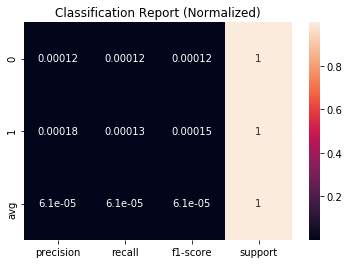

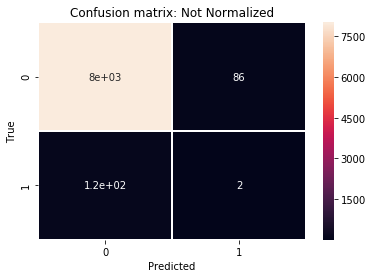

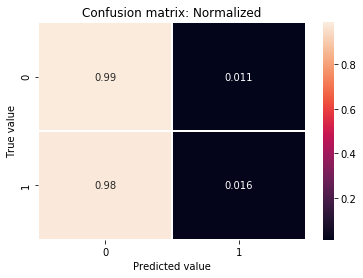

In [7]:
Classifier.classifier("training.csv","test.csv")